# LIMEtree experiments

In [1]:
import logging
import pickle

import numpy as np
import scripts.image_classifier as imgclf

from scripts.limetree import (
    logger,
    explain_image,
    compute_loss, process_loss, summarise_loss_lime, summarise_loss_limet,
    plot_loss_summary, tabulate_loss_summary)

22-Sep-06 10:15:11 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [2]:
! mkdir -p _figures

# logging.basicConfig(level=logging.DEBUG)
logger.setLevel(logging.DEBUG)

%matplotlib inline

In [3]:
clf = imgclf.ImageClassifier(use_gpu=False)
img_path = './img/dog_ball.jpg'

## Test Processing Images

In [4]:
img_path_, top_pred, similarities, lime, limet = explain_image(
    img_path, clf, random_seed=42, n_top_classes=3,
    batch_size=50,                              # Processing
    segmenter_type='slic',                      # Segmenter Type
    n_segments=13,                              # Slic Segmenter
    occlusion_colour='black',                   # Occluder
    generate_complete_sample=True,              # Sampler
    kernel_width=0.25)                          # Similarity

22-Sep-06 10:15:13 scripts.limetree DEBUG    Is RANDOM sample used for surrogate training: False
22-Sep-06 10:15:13 scripts.limetree DEBUG    Is RANDOM sample used for surrogate training: False
22-Sep-06 10:15:13 scripts.limetree DEBUG    Image: ./img/dog_ball.jpg
22-Sep-06 10:15:13 scripts.limetree DEBUG    Image: ./img/dog_ball.jpg
22-Sep-06 10:15:13 scripts.limetree DEBUG    Segmenter in use: slic
22-Sep-06 10:15:13 scripts.limetree DEBUG    Segmenter in use: slic
/mnt/data/shared/ks1591/pyenv/versions/3.7.13/envs/blimey-test/lib/python3.7/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered int

In [5]:
assert img_path == img_path_, 'Expect the same image'
assert np.array_equal(top_pred, [852, 207, 208]), 'Expect correct predictions'

## Run Sample Processor

In [6]:
sample_images = [img_path]
collector = {}

for img in sample_images:
    img_path_, top_pred, similarities, lime, limet = explain_image(
        img, clf, random_seed=42, n_top_classes=3,
        batch_size=50,                              # Processing
        segmenter_type='slic',                      # Segmenter Type
        n_segments=13,                              # Slic Segmenter
        occlusion_colour='black',                   # Occluder
        generate_complete_sample=True,              # Sampler
        kernel_width=0.25)                          # Similarity
    logger.debug(f'Processed image: {img_path_}')
    collector[img_path_] = (top_pred, similarities, lime, limet)

22-Sep-06 10:15:47 scripts.limetree DEBUG    Is RANDOM sample used for surrogate training: False
22-Sep-06 10:15:47 scripts.limetree DEBUG    Is RANDOM sample used for surrogate training: False
22-Sep-06 10:15:47 scripts.limetree DEBUG    Image: ./img/dog_ball.jpg
22-Sep-06 10:15:47 scripts.limetree DEBUG    Image: ./img/dog_ball.jpg
22-Sep-06 10:15:47 scripts.limetree DEBUG    Segmenter in use: slic
22-Sep-06 10:15:47 scripts.limetree DEBUG    Segmenter in use: slic
22-Sep-06 10:15:47 scripts.limetree DEBUG    Top n classes: 3
22-Sep-06 10:15:47 scripts.limetree DEBUG    Top n classes: 3
22-Sep-06 10:15:47 fatf         INFO     Seeding RNGs using the input parameter.
22-Sep-06 10:15:47 fatf         INFO     Seeding RNGs with 42.
22-Sep-06 10:15:47 scripts.limetree DEBUG    Segments number: 4
22-Sep-06 10:15:47 scripts.limetree DEBUG    Segments number: 4
22-Sep-06 10:15:47 scripts.limetree DEBUG    Sampled data shape: (16, 4)
22-Sep-06 10:15:47 scripts.limetree DEBUG    Sampled data s

In [7]:
destination = 'limet_sample.pickle'
with open(destination, 'wb') as w_file:
    pickle.dump(collector, w_file,
                protocol=pickle.HIGHEST_PROTOCOL)


## Analyse Data

In [8]:
source = 'limet_sample.pickle'
with open(source, 'rb') as r_file:
    collector = pickle.load(r_file)

In [9]:
if isinstance(collector, list):
    collector = {i:j for i, j in enumerate(collector)}

In [10]:
print(f'Number of processed images: {len(collector.keys())}')

Number of processed images: 1


In [11]:
top_classes, lime_scores, limet_scores = process_loss(collector)

22-Sep-06 10:16:13 scripts.limetree DEBUG    Number of processed images: 1
22-Sep-06 10:16:13 scripts.limetree DEBUG    Number of processed images: 1


In [12]:
lime_scores_summary = summarise_loss_lime(lime_scores, top_classes)

In [13]:
limet_scores_summary = summarise_loss_limet(limet_scores, top_classes)

Saving to: _figures/loss-cls1-lime_weighted_Xrandom.pdf


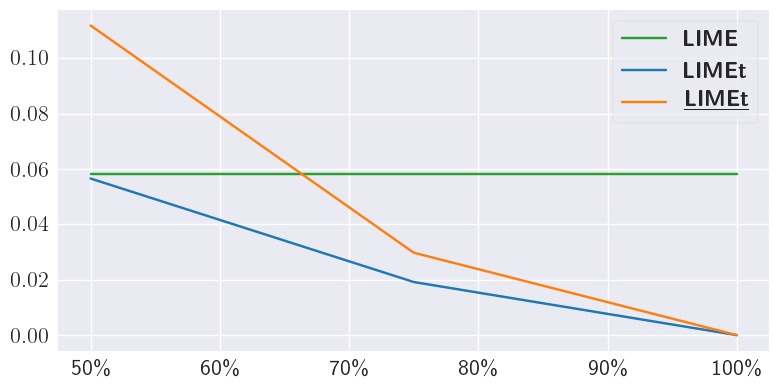

In [14]:
# NBVAL_IGNORE_OUTPUT
plot_loss_summary(lime_scores_summary, limet_scores_summary,
                  1, use_limet_loss=False,
                  use_weighted=True, use_random=False)

In [15]:
tabulate_loss_summary(lime_scores_summary, limet_scores_summary, 1,
                      0.33, scale_factor=1, latex=True,
                      use_limet_loss=False, use_weighted=True, use_random=False)

\(0.06\pm0.00\)
\(0.05\pm0.00\)
\(0.08\pm0.00\)


{'lime': (0.0005733150085975227, 0.0),
 'limet': (0.0004529789856114631, 0.0),
 'limetf': (0.000833485910497353, 0.0)}